# 1. Apresentação do projeto




# Data Analytics Tech Challenge - Fase 4 Big Data

## Grupo 96

- [Letícia Maia de Oliveira](https://www.linkedin.com/in/lemaia/)

## O Problema

Você foi contratado(a) por uma consultoria, e seu trabbalho envolve analisar os dados de preço do petóleo brento, que pode ser encontrado no site do ipea. Essa base de dados histórica envolve duas colunas: data e preço(em dólares).
Um grande cliente do segmento pediu para que a consultoria desenvolvesse um dasboard interativo que gere insights relevantes para tomada de decisão. Além disso, solicitaram que fosse desenvolvido um modelo de Machine Learning para fazer o forecasting do preço do petróleo.

# Objetivo
Criar um dashboard interativo com a ferramenta à sua escolha.Seu dashboard deve fazer parte de um storytelling que traga insights relevantes sobre a variação do preço do petróleo, situação geopolícas. crise econômicas, demanda global por energia. Isso pode te ajudar com seu modelo. É obrigatório que traga ao menos 4 insigths neste desafio.

Criar um modelo de machine learning que faça a previsão do preço do petróleo diariamente(lembre-se de time series). Esse modelo deve estar comtemplado em seu storytelling e deve conter o código que você trabalhou, analisando as performances do modelo.

Crie um plano de deploy em produção do modelo, com as ferramentas que são necessárias.

Faça um MVP do seu modelo em produção utilizando streamlit.

## Dicionário de dados

- Data: data em que os dados foram obtidos
- Último: preço do índice no fechamento
- Abertura: preço do índice na abertura do mercado
- Máxima: maior preço durante o dia
- Mínima: menor preço durante o dia
- Vol.: volume de negociações
- Var%: variação do preço entre a abertura e o fechamento

# 2. Importações

In [ ]:
#Importação das bibliotecas
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import GradientBoostingRegressor




In [ ]:
# Lendo dados da fonte externa para que todos consigam rodar o código no Colab sem ter que fazer upload do arquivo
# Mantendo Dataframe original para facilitar rodar as transformações multiplas vezes
df = pd.read_csv(
    'https://raw.githubusercontent.com/LeticiaMoliveira/FIAP/main/Fase%204/petroleo.csv',
    parse_dates=['Date'], dayfirst=True,
    thousands='.', decimal=',')
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


#2. Análise exploratória de dados

## 2.1 Visualização de dados históricos

Com objetivo  entender a distribuição, tendências e padrões. da nossa base de dados decidimos plotar gráficos de linha, gráficos de dispersão e histogramas

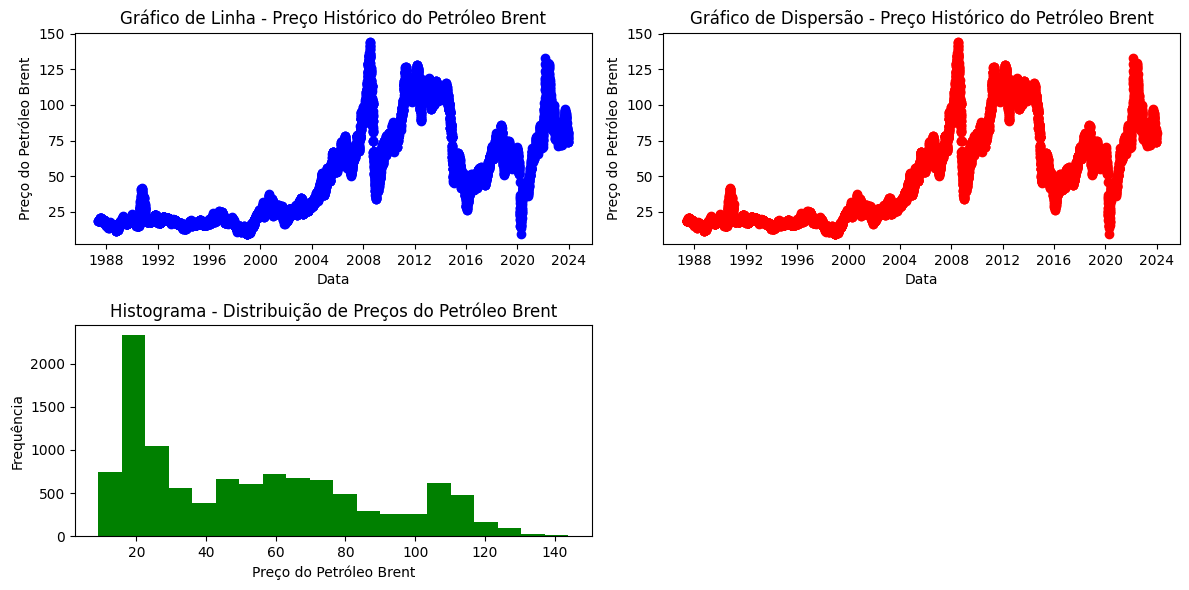

In [ ]:


# Convertendo a coluna de datas para o tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Ordfenando os dados por data
df = df.sort_values('Date')

# Configurando o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Gráfico de Linha
plt.subplot(2, 2, 1)
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-', color='blue')
plt.xlabel('Data')
plt.ylabel('Preço do Petróleo Brent')
plt.title('Gráfico de Linha - Preço Histórico do Petróleo Brent')

# Gráfico de Dispersão
plt.subplot(2, 2, 2)
plt.scatter(df['Date'], df['Price'], color='red')
plt.xlabel('Data')
plt.ylabel('Preço do Petróleo Brent')
plt.title('Gráfico de Dispersão - Preço Histórico do Petróleo Brent')

# Histograma
plt.subplot(2, 2, 3)
plt.hist(df['Price'], bins=20, color='green')
plt.xlabel('Preço do Petróleo Brent')
plt.ylabel('Frequência')
plt.title('Histograma - Distribuição de Preços do Petróleo Brent')

# Exibindo os gráficos
plt.tight_layout()
plt.show()


##2.2 Análise estátistica descritiva

In [ ]:
# Calculando as estatísticas descritivas
estatisticas = df['Price'].describe()

# Exibindo as estatísticas descritivas
print(estatisticas)


count    11074.000000
mean        52.754036
std         33.240415
min          9.100000
25%         20.385000
50%         47.805000
75%         75.547500
max        143.950000
Name: Price, dtype: float64


##2.3 Decomposição da Série temporal

Com objetivo de entender os padrões de variação ao longo do tempo nos preços do petróleo foi realizado decomposição da série temporal para identificar tendências, sazonalidades e componentes residuais.

<Figure size 1600x600 with 0 Axes>

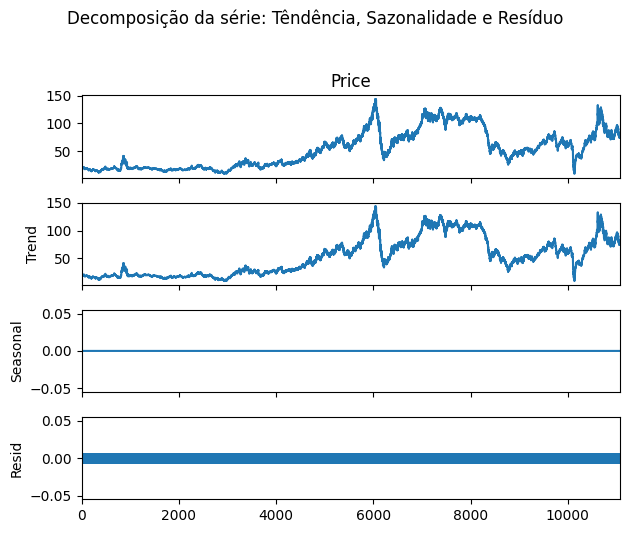

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df["Price"], model = 'additive',period=1)
plt.figure(figsize = (16, 6))
fig= decomposition.plot( ).suptitle('Decomposição da série: Têndência, Sazonalidade e Resíduo',y=1.1)
plt.show()

## 2.4 Análise de Correlação

Inicialmente iremos realizar uma análise de correlação entre os preço dos demais commodities de energia com preço do petróleo Brent.

<ipython-input-6-94426f150ac2>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = price.corr()


<Axes: >

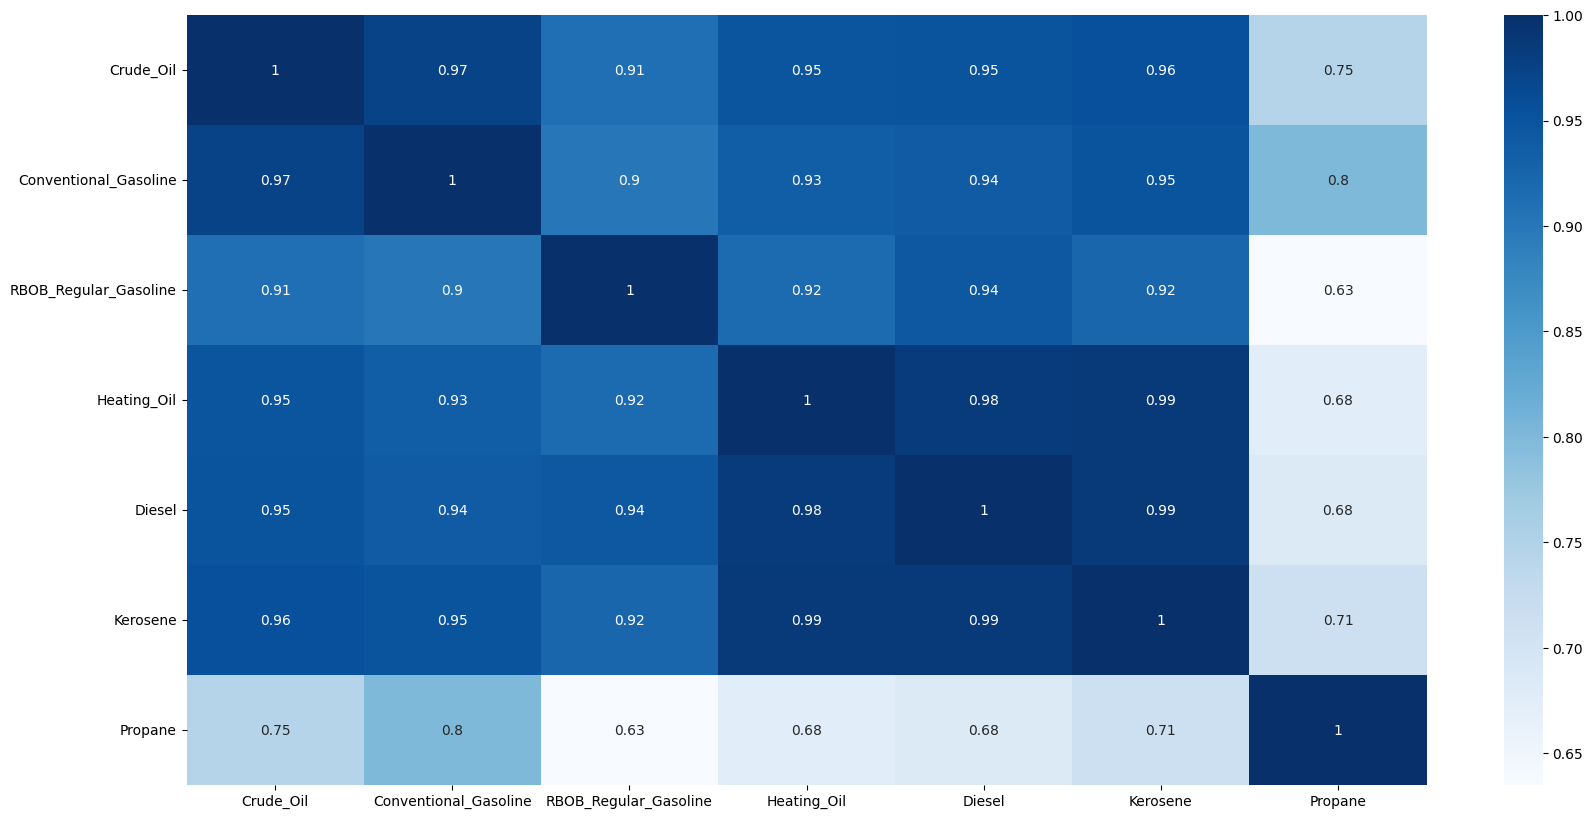

In [ ]:
path= 'https://github.com/LeticiaMoliveira/FIAP/raw/main/Fase%204/Corr_price.xlsx'
temp = pd.read_excel(path,sheet_name="Data 1")
temp2 = pd.read_excel(path,sheet_name="Data 2")
temp3 = pd.read_excel(path,sheet_name="Data 3")
temp4 = pd.read_excel(path,sheet_name="Data 4")
temp5 = pd.read_excel(path,sheet_name="Data 5")
temp6 = pd.read_excel(path,sheet_name="Data 6")
temp7 = pd.read_excel(path,sheet_name="Data 7")

price= pd.merge(temp, temp2, on = "Date")
price= pd.merge(price, temp3, on = "Date")
price= pd.merge(price, temp4, on = "Date")
price= pd.merge(price, temp5, on = "Date")
price= pd.merge(price, temp6, on = "Date")
price= pd.merge(price, temp7, on = "Date")



import matplotlib.pyplot as plt
import seaborn as sns

corr = price.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, cmap="Blues", annot=True)


## 2.5 Análise e tratamento de outliers
Como os outliers podem afetar negativamente o desempenho do modelo, decidimos detectá-los e trata-los.

Outliers:
Empty DataFrame
Columns: [Date, Price]
Index: []


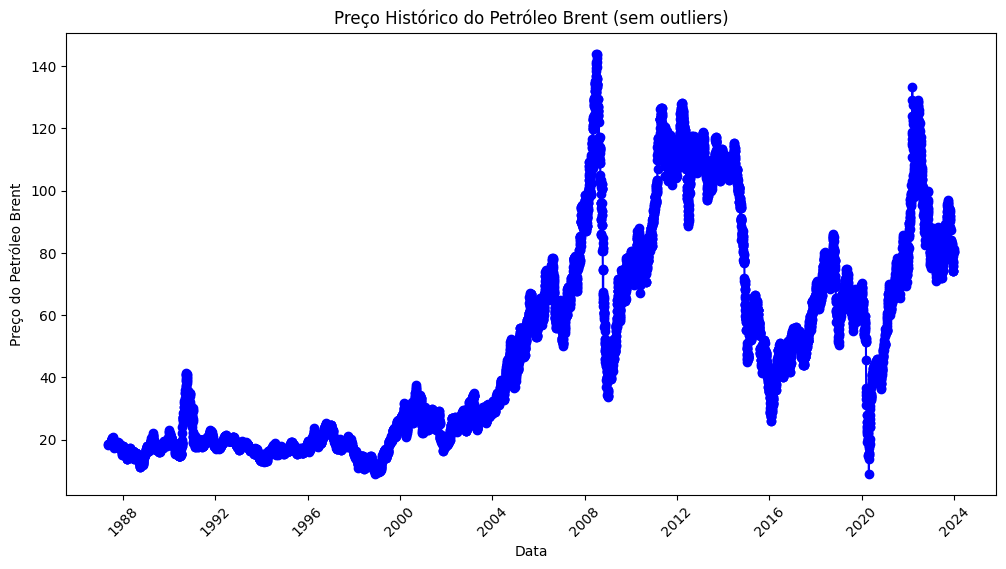

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Identificando os outliers usando o método do desvio padrão
mean = np.mean(df['Price'])
std = np.std(df['Price'])
threshold = 3  # Definindo um limite de 3 desvios padrão

outliers = df[(df['Price'] > mean + threshold * std) | (df['Price'] < mean - threshold * std)]

# Exibindo os outliers
print('Outliers:')
print(outliers)

# Tratando os outliers (exemplo: removendo-os do dataframe)
df = df[~((df['Price'] > mean + threshold * std) | (df['Price'] < mean - threshold * std))]

# Plotando o gráfico sem os outliers
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-', color='blue')
plt.xlabel('Data')
plt.ylabel('Preço do Petróleo Brent')
plt.title('Preço Histórico do Petróleo Brent (sem outliers)')
plt.xticks(rotation=45)
plt.show()

##2.6 Teste de normalidade

- Hipótese Nula: os dados seguem distribuição normal
- Hipótese Alternativa: os dados não seguem distribuição normal

Nível de confiança: 95%

In [ ]:
alpha = 0.05
k2, p = normaltest(df['Price'])

print('Teste de normalidade sobre o preço do fechamento')
if p < alpha:
    print('A Hipótese Nula pode ser rejeitada, ou seja, Distribuição NÃO é normal')
else:
    print('A hipótese nula não pode ser rejeitada, ou seja, a Distribuição é normal')

Teste de normalidade sobre o preço do fechamento
A Hipótese Nula pode ser rejeitada, ou seja, Distribuição NÃO é normal


##2.7 Análise de lags

Com objetivo de identificar padrões relevantes para o modelo, iremos explorar a relação entre os preços atuais e anteriores do petróleo Brent.

Correlação entre o preço defasado e o preço atual: 0.9990392358899421


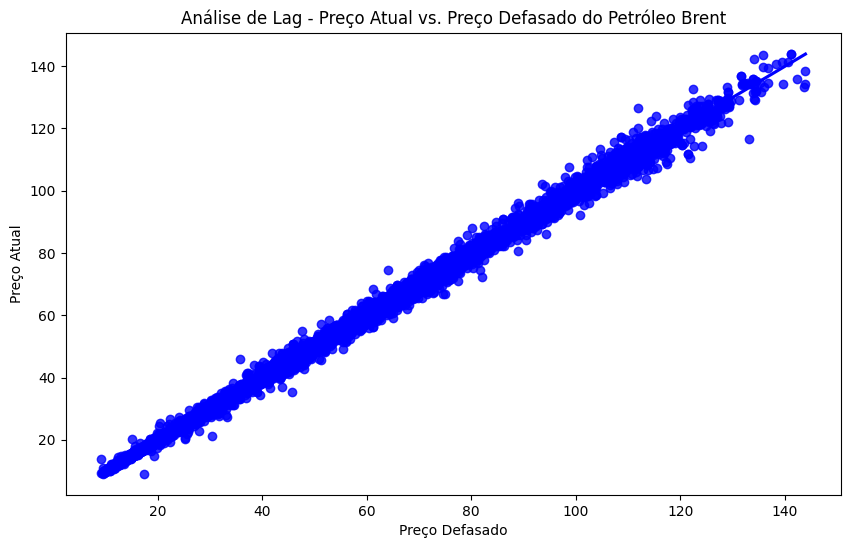

In [ ]:
df_defasado= df.copy()

# Criando uma coluna com o preço defasado
df_defasado['Price Lagged'] = df_defasado['Price'].shift(1)

# Removendo a primeira linha que contém um valor NaN devido ao deslocamento
df_defasado = df_defasado.dropna()

# Plotando um scatter plot com regressão linear
plt.figure(figsize=(10, 6))
sns.regplot(x=df_defasado['Price Lagged'], y=df_defasado['Price'], color='blue')
plt.xlabel('Preço Defasado')
plt.ylabel('Preço Atual')
plt.title('Análise de Lag - Preço Atual vs. Preço Defasado do Petróleo Brent')

# Calculando a correlação entre o preço defasado e o preço atual
correlation = df_defasado['Price Lagged'].corr(df_defasado['Price'])
print(f"Correlação entre o preço defasado e o preço atual: {correlation}")

# Exibindo o gráfico
plt.show()


In [ ]:
df

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
11069,2023-12-19,79.82
11070,2023-12-20,81.10
11071,2023-12-21,80.73
11072,2023-12-22,80.23



## 2.8 Análise e tratamento de valores ausentes

In [ ]:
# Verificando a quantidade de valores ausentes em cada coluna
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)


Valores ausentes por coluna:
Date     0
Price    0
dtype: int64


#Machine Learning

Nesta etapa iremos escolher o algoritmo de machine learning com o melhor MAPE e salva-lo para execução em nossa aplicação streamlit.

In [ ]:
df

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
11069,2023-12-19,79.82
11070,2023-12-20,81.10
11071,2023-12-21,80.73
11072,2023-12-22,80.23


In [ ]:

# Definir as features e o target
X = df.drop('Price', axis=1)
y = df['Price']

# Definir os modelos para avaliação
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('Support Vector Regression', SVR()),
    ('Multi-layer Perceptron', MLPRegressor()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Gaussian Process', GaussianProcessRegressor(RBF())),
    ('Gradient Boosting', GradientBoostingRegressor())
]

# Definir uma função para calcular o MAPE
def calculate_mape(y_true, y_pred):
    return mean_absolute_percentage_error(y_true, y_pred)

# Definir uma função para treinar e avaliar um modelo
def train_and_evaluate_model(model):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    cv = TimeSeriesSplit(n_splits=5)
    scores = []
    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        score = calculate_mape(y_test, y_pred)
        scores.append(score)

    mape = sum(scores) / len(scores)
    return mape

# Avaliar os modelos e armazenar os resultados
results = []
best_model = None
best_mape = float('inf')

for name, model in models:
    mape = train_and_evaluate_model(model)
    results.append((name, mape))

    if mape < best_mape:
        best_model = model
        best_mape = mape

# Criar um DataFrame com os resultados
results_df = pd.DataFrame(results, columns=['Algoritmo', 'MAPE'])

# Salvar o melhor modelo usando joblib
joblib.dump(best_model, 'melhor_modelo.joblib')

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

['melhor_modelo.joblib']

In [ ]:
# Exibir a tabela com os resultados
print(results_df)

# Encontrar o melhor algoritmo com base no menor MAPE
best_model = results_df.loc[results_df['MAPE'].idxmin(), 'Algoritmo']
print(f'Melhor algoritmo: {best_model}')

                   Algoritmo      MAPE
0          Linear Regression  0.442817
1              Random Forest  0.442973
2  Support Vector Regression  0.475737
3     Multi-layer Perceptron  0.425690
4              Decision Tree  0.446254
5        K-Nearest Neighbors  0.442807
6           Gaussian Process  1.000000
7          Gradient Boosting  0.435969
Melhor algoritmo: Multi-layer Perceptron
